<center><font size="16" ><b>Extracting Color Channels</b></font></center>

<table align="center">
    <tr align="center"><th>original</th><th>red channel</th><th>green channel</th><th>blue channel</th></tr>
<tr>
<td><img src="./imgs/two.orig.png" width="100"/> </td>
<td><img src="./imgs/red_two.png" width="100"/> </td>
<td><img src="./imgs/green_two.png" width="100"/></td>
<td><img src="./imgs/blue_two.png" width="100"/></td>
</tr>
</table>

### Before we can begin convoluting and pooling , we first extract the color channels.  
### This process takes an image, and separates out the 3 color channels.  We will ignore alpha/transparency.

### 1. load image data into memory

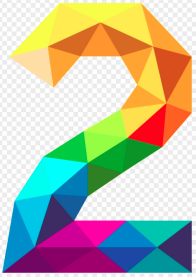

In [8]:
from PIL import Image
from AI_Decomposed import *
image_file = './imgs/two.orig.png'
display(Image.open(image_file))

### 2. height -  width -  channels - alpha 

An image contains channels, typically the channels are the colors, and possibly the alpha channel, which sets the level of transparency.  
On \*nix systems, the 'identify' command sets or gets image metadata, like dimensions and color scheme.

In [2]:
# get image meta-data, height, width, channels 
!identify {image_file}
height_raw = !identify -format '%h' {image_file}
height_raw = int(height_raw[0])
width_raw = !identify -format '%w' {image_file}
width_raw = int(width_raw[0])
has_alpha_channel = !identify -format '%A' {image_file}
has_alpha_channel = has_alpha_channel[0]
channel_cnt = 3
if has_alpha_channel:
    channel_cnt = 4
# only 3 channels, red, green, blue, no alpha
channel_size = width_raw * height_raw
print('image height  : ', height_raw)
print('image width   : ', width_raw)
print('channel count : ', channel_cnt)

./imgs/two.orig.png PNG 196x277 196x277+0+0 8-bit sRGB 35.5KB 0.000u 0:00.000
image height  :  277
image width   :  196
channel count :  4


### function : return color channels and metadata as lists

In [3]:
def image_meta(image_file):
    img = Image.open(image_file)
    width, height = img.size    
    channel_cnt = 3
    channel_size = width * height    
    pixels = list(img.getdata())
    red = list()
    green = list()
    blue = list()
    # will discard alpha channel
    for quadruple in pixels:
        red.append(quadruple[0])
        green.append(quadruple[1])
        blue.append(quadruple[2])
    
    return [height, width, red, green, blue]    

### test new function

In [4]:
[h,w,r,g,b] = image_meta('./imgs/two.orig.png')

196  x  277


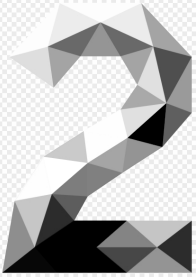

In [5]:
img = Image.new('L', (w, h))
print(w, ' x ', h)
img.putdata(g)
display(img)

### function : displaying image channels

In [6]:
def display_channel(pixels, width):
    from PIL import Image
    height = (int) (len(pixels)/width)
    img = Image.new('L', (width, height))
    img.putdata(pixels)
    display(img)

### save channels as images

In [9]:
save_image(r,w,'red_two.png')
save_image(g,w,'green_two.png')
save_image(b,w,'blue_two.png')

### 3. display channels

<table align="left">
    <tr align="center"><th>original</th><th>red channel</th><th>green channel</th><th>blue channel</th></tr>
<tr>
<td><img src="./imgs/two.orig.png"/> </td>
<td><img src="./imgs/red_two.png"/> </td>
<td><img src="./imgs/green_two.png"/></td>
<td><img src="./imgs/blue_two.png"/></td>
</tr>
</table>

# NEXT  -  Python Convolutions

http://localhost:8888/notebooks/2_Py_Convolution.ipynb

<table align="left">
<tr>
    <td><img src='imgs/green_golf.jpg' width='600'/></td>
    <td><img src='imgs/golf_green.png' width='600'/></td>
    <td><img src='imgs/golf_convo.png' width='600'/></td>
    </tr>
</table>
